In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import csv
import pandas as pd
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
comet_mpi4py      = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/comet_mpi4py_IO.csv')
comet_mpi4pyBreak = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/comet_mpi4py_IO_break.csv')
comet_rp          = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/comet_rp_IO.csv')
comet_spark       = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/comet_spark_IO.csv')
#comet_dask   = pd.DataFrame.from_csv('stragglers/tidy_data/comet_dask_NoIO.csv')

In [3]:
comet_mpi4py1 = comet_mpi4py[comet_mpi4py['Nodes']==1].drop(['Nodes'],axis=1)
comet_mpi4py2 = comet_mpi4py[comet_mpi4py['Nodes']==2].drop(['Nodes'],axis=1)
comet_mpi4py3 = comet_mpi4py[comet_mpi4py['Nodes']==3].drop(['Nodes'],axis=1)

comet_mpi4py1Ex = comet_mpi4py1[comet_mpi4py1['Measurement']=='Execution'].drop(['Run','ID','Measurement'],axis=1)
comet_mpi4py1Comm = comet_mpi4py1[comet_mpi4py1['Measurement']=='Communication'].drop(['Run','ID','Measurement'],axis=1)
comet_mpi4pyTx1 = comet_mpi4py1Ex + comet_mpi4py1Comm

comet_mpi4py2Ex = comet_mpi4py2[comet_mpi4py2['Measurement']=='Execution'].drop(['Run','ID','Measurement'],axis=1)
comet_mpi4py2Comm = comet_mpi4py2[comet_mpi4py2['Measurement']=='Communication'].drop(['Run','ID','Measurement'],axis=1)
comet_mpi4pyTx2 = comet_mpi4py2Ex.reset_index(drop='index') + comet_mpi4py2Comm.reset_index(drop='index')

comet_mpi4py3Ex = comet_mpi4py3[comet_mpi4py3['Measurement']=='Execution'].drop(['Run','ID','Measurement'],axis=1)
comet_mpi4py3Comm = comet_mpi4py3[comet_mpi4py3['Measurement']=='Communication'].drop(['Run','ID','Measurement'],axis=1)
comet_mpi4pyTx3 = comet_mpi4py3Ex.reset_index(drop='index') + comet_mpi4py3Comm.reset_index(drop='index')

comet_spark1 = comet_spark[comet_spark['Nodes']==1].drop(['Framework','Nodes'],axis=1)
comet_spark2 = comet_spark[comet_spark['Nodes']==2].drop(['Framework','Nodes'],axis=1)
comet_spark3 = comet_spark[comet_spark['Nodes']==3].drop(['Framework','Nodes'],axis=1)

comet_rp1 = comet_rp[comet_rp['Nodes']==1].drop(['Framework','Nodes'],axis=1)
comet_rp2 = comet_rp[comet_rp['Nodes']==2].drop(['Framework','Nodes'],axis=1)
comet_rp3 = comet_rp[comet_rp['Nodes']==3].drop(['Framework','Nodes'],axis=1)

#comet_dask1 = comet_dask[comet_dask['Nodes']==1].drop(['Framework','Nodes'],axis=1)
#comet_dask2 = comet_dask[comet_dask['Nodes']==2].drop(['Framework','Nodes'],axis=1)
#comet_dask3 = comet_dask[comet_dask['Nodes']==3].drop(['Framework','Nodes'],axis=1)

#comet_dask1 = comet_dask[comet_dask['Nodes']==1].drop(['Framework','Nodes'],axis=1)
#comet_dask2 = comet_dask[comet_dask['Nodes']==2].drop(['Framework','Nodes'],axis=1)
#comet_dask3 = comet_dask[comet_dask['Nodes']==3].drop(['Framework','Nodes'],axis=1)

In [4]:
comet_mpi4py1B = comet_mpi4pyBreak[comet_mpi4pyBreak['Nodes']==1].drop(['Nodes'],axis=1)
comet_mpi4py2B = comet_mpi4pyBreak[comet_mpi4pyBreak['Nodes']==2].drop(['Nodes'],axis=1)
comet_mpi4py3B = comet_mpi4pyBreak[comet_mpi4pyBreak['Nodes']==3].drop(['Nodes'],axis=1)

comet_mpi4py1Comp = comet_mpi4py1B[comet_mpi4py1B['Measurement']=='Compute'].drop(['Run','ID','Measurement'],axis=1)
comet_mpi4py1IO = comet_mpi4py1B[comet_mpi4py1B['Measurement']=='IO'].drop(['Run','ID','Measurement'],axis=1)

comet_mpi4py2Comp = comet_mpi4py2B[comet_mpi4py2B['Measurement']=='Compute'].drop(['Run','ID','Measurement'],axis=1)
comet_mpi4py2IO = comet_mpi4py2B[comet_mpi4py2B['Measurement']=='IO'].drop(['Run','ID','Measurement'],axis=1)

comet_mpi4py3Comp = comet_mpi4py3B[comet_mpi4py3B['Measurement']=='Compute'].drop(['Run','ID','Measurement'],axis=1)
comet_mpi4py3IO = comet_mpi4py3B[comet_mpi4py3B['Measurement']=='IO'].drop(['Run','ID','Measurement'],axis=1)



In [5]:
Cmpi4pyS = [0,#((comet_mpi4py1Ex>(comet_mpi4py1Ex.mean()+3*comet_mpi4py1Ex.std()))==True).sum().values[0]/len(comet_mpi4py1Ex),
            ((comet_mpi4pyTx2>(comet_mpi4pyTx2.mean()+3*comet_mpi4pyTx2.std()))==True).sum().values[0]/len(comet_mpi4pyTx2),
            ((comet_mpi4pyTx3>(comet_mpi4pyTx3.mean()+3*comet_mpi4pyTx3.std()))==True).sum().values[0]/len(comet_mpi4pyTx3)]

CsparkS = [0,#((comet_spark1>(comet_spark1.mean()+3*comet_spark1.std()))==True).sum().values[0]/len(comet_spark1),
            ((comet_spark2>(comet_spark2.mean()+2*comet_spark2.std()))==True).sum().values[0]/len(comet_spark2),
            ((comet_spark3>(comet_spark3.mean()+2*comet_spark3.std()))==True).sum().values[0]/len(comet_spark3)]

CrpS   = [0,#((comet_rp1>(comet_rp1.mean()+3*comet_rp1.std()))==True).sum().values[0]/len(comet_rp1),
            ((comet_rp2>(comet_rp2.mean()+3*comet_rp2.std()))==True).sum().values[0]/len(comet_rp2),
            ((comet_rp3>(comet_rp3.mean()+3*comet_rp3.std()))==True).sum().values[0]/len(comet_rp3)]

In [6]:
#wrangler_mpi4py = pd.DataFrame.from_csv('stragglers/tidy_data/wrangler_mpi4py_NoIO.csv')
#wrangler_mpicpp = pd.DataFrame.from_csv('stragglers/tidy_data/wrangler_mpic++_NoIO.csv')
#wrangler_dask   = pd.DataFrame.from_csv('stragglers/tidy_data/wrangler_dask_NoIO.csv')
#wrangler_spark  = pd.DataFrame.from_csv('stragglers/tidy_data/wrangler_spark_NoIO.csv')
#wrangler_rp     = pd.DataFrame.from_csv('stragglers/tidy_data/wrangler_rp_NoIO.csv')

In [7]:
#wrangler_mpi4py1 = wrangler_mpi4py[wrangler_mpi4py['Nodes']==1].drop(['Framework','Nodes'],axis=1)
#wrangler_mpi4py2 = wrangler_mpi4py[wrangler_mpi4py['Nodes']==2].drop(['Framework','Nodes'],axis=1)
#wrangler_mpi4py3 = wrangler_mpi4py[wrangler_mpi4py['Nodes']==3].drop(['Framework','Nodes'],axis=1)

#wrangler_mpicpp1 = wrangler_mpicpp[wrangler_mpicpp['Nodes']==1].drop(['Framework','Nodes'],axis=1)
#wrangler_mpicpp2 = wrangler_mpicpp[wrangler_mpicpp['Nodes']==2].drop(['Framework','Nodes'],axis=1)
#wrangler_mpicpp3 = wrangler_mpicpp[wrangler_mpicpp['Nodes']==3].drop(['Framework','Nodes'],axis=1)

#wrangler_dask1 = wrangler_dask[wrangler_dask['Nodes']==1].drop(['Framework','Nodes'],axis=1)
#wrangler_dask2 = wrangler_dask[wrangler_dask['Nodes']==2].drop(['Framework','Nodes'],axis=1)
#wrangler_dask3 = wrangler_dask[wrangler_dask['Nodes']==3].drop(['Framework','Nodes'],axis=1)

#wrangler_spark1 = wrangler_spark[wrangler_spark['Nodes']==1].drop(['Framework','Nodes'],axis=1)
#wrangler_spark2 = wrangler_spark[wrangler_spark['Nodes']==2].drop(['Framework','Nodes'],axis=1)
#wrangler_spark3 = wrangler_spark[wrangler_spark['Nodes']==3].drop(['Framework','Nodes'],axis=1)

#wrangler_rp1 = wrangler_rp[wrangler_rp['Nodes']==1].drop(['Framework','Nodes'],axis=1)
#wrangler_rp2 = wrangler_rp[wrangler_rp['Nodes']==2].drop(['Framework','Nodes'],axis=1)
#wrangler_rp3 = wrangler_rp[wrangler_rp['Nodes']==3].drop(['Framework','Nodes'],axis=1)

In [8]:
#Wmpi4pyS = [((wrangler_mpi4py1>(wrangler_mpi4py1.mean()+3*wrangler_mpi4py1.std()))==True).sum().values[0]/len(wrangler_mpi4py1),
#            ((wrangler_mpi4py2>(wrangler_mpi4py2.mean()+3*wrangler_mpi4py2.std()))==True).sum().values[0]/len(wrangler_mpi4py2),
#            ((wrangler_mpi4py3>(wrangler_mpi4py3.mean()+3*wrangler_mpi4py3.std()))==True).sum().values[0]/len(wrangler_mpi4py3)]

#WmpicppS = [((wrangler_mpicpp1>(wrangler_mpicpp1.mean()+3*wrangler_mpicpp1.std()))==True).sum().values[0]/len(wrangler_mpicpp1),
#            ((wrangler_mpicpp2>(wrangler_mpicpp2.mean()+3*wrangler_mpicpp2.std()))==True).sum().values[0]/len(wrangler_mpicpp2),
#            ((wrangler_mpicpp3>(wrangler_mpicpp3.mean()+3*wrangler_mpicpp3.std()))==True).sum().values[0]/len(wrangler_mpicpp3)]

#WdaskS   = [((wrangler_dask1>(wrangler_dask1.mean()+3*wrangler_dask1.std()))==True).sum().values[0]/len(wrangler_dask1),
#            ((wrangler_dask2>(wrangler_dask2.mean()+3*wrangler_dask2.std()))==True).sum().values[0]/len(wrangler_dask2),
#            ((wrangler_dask3>(wrangler_dask3.mean()+3*wrangler_dask3.std()))==True).sum().values[0]/len(wrangler_dask3)]

#WsparkS  = [((wrangler_spark1>(wrangler_spark1.mean()+3*wrangler_spark1.std()))==True).sum().values[0]/len(wrangler_spark1),
#            ((wrangler_spark2>(wrangler_spark2.mean()+3*wrangler_spark2.std()))==True).sum().values[0]/len(wrangler_spark2),
#            ((wrangler_spark3>(wrangler_spark3.mean()+3*wrangler_spark3.std()))==True).sum().values[0]/len(wrangler_spark3)]

#WrpS     = [((wrangler_rp1>(wrangler_rp1.mean()+3*wrangler_rp1.std()))==True).sum().values[0]/len(wrangler_rp1),
#            ((wrangler_rp2>(wrangler_rp2.mean()+3*wrangler_rp2.std()))==True).sum().values[0]/len(wrangler_rp2),
#            ((wrangler_rp3>(wrangler_rp3.mean()+3*wrangler_rp3.std()))==True).sum().values[0]/len(wrangler_rp3)]

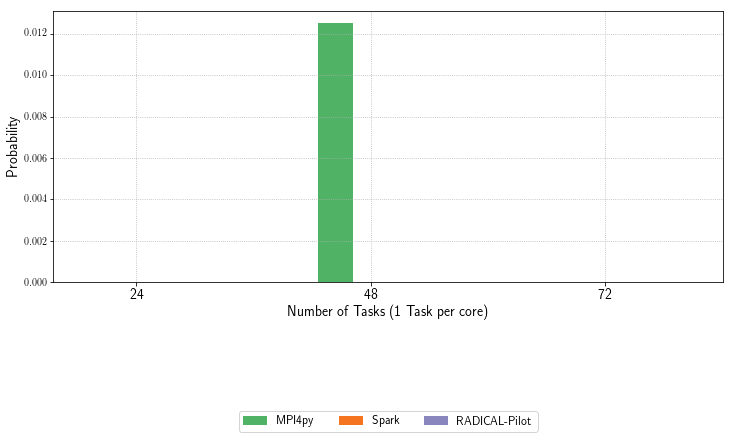

In [9]:
fig,axes = plt.subplots(nrows=1,ncols=1, sharex=True,sharey=True,figsize=[12,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
x = np.arange(3)
width = 0.15
#axes[0].bar(x-2*width,CmpicppS,color=blues(150),width=width,label='MPIC++')
axes.bar(x-width,Cmpi4pyS,color=greens(150),width=width,label='MPI4py')
#axes[0].bar(x+0*width,CdaskS,color=reds(150),width=width,label='Dask')
axes.bar(x+1*width,CsparkS,color=oranges(150),width=width,label='Spark')
axes.bar(x+2*width,CrpS,color=purples(150),width=width,label='RADICAL-Pilot')

#axes[1].bar(x-2*width,WmpicppS,color=blues(150),width=width,label='MPIC++')
#axes[1].bar(x-width,Wmpi4pyS,color=greens(150),width=width,label='MPI4py')
#axes[1].bar(x+0*width,WdaskS,color=reds(150),width=width,label='Dask')
#axes[1].bar(x+1*width,WsparkS,color=oranges(150),width=width,label='Spark')
#axes[1].bar(x+2*width,WrpS,color=purples(150),width=width,label='RADICAL-Pilot')
axes.grid('on',which='both',linestyle=':')
#axes[1].grid('on',which='both',linestyle=':')
axes.set_xlabel('Number of Tasks (1 Task per core)',fontsize=14)
axes.set_xticks([0,1,2])
axes.set_xticklabels(['24','48','72'],fontsize=14)
axes.set_ylabel('Probability',fontsize=14)
#axes[1].set_ylabel('Probability',fontsize=14)
#axes[0].text(2.35,0.06, 'Comet',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
#axes[1].text(2.35,.07, 'Wrangler',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes.legend(['MPI4py','Spark','RADICAL-Pilot'],fontsize=12,bbox_to_anchor=(0., -.55, 1,0), loc='lower center',ncol=5, borderaxespad=0.)
#fig.savefig('straggler_prob_NoIO.pdf',dpi=800,bbox_inches='tight',pad_inches=0)

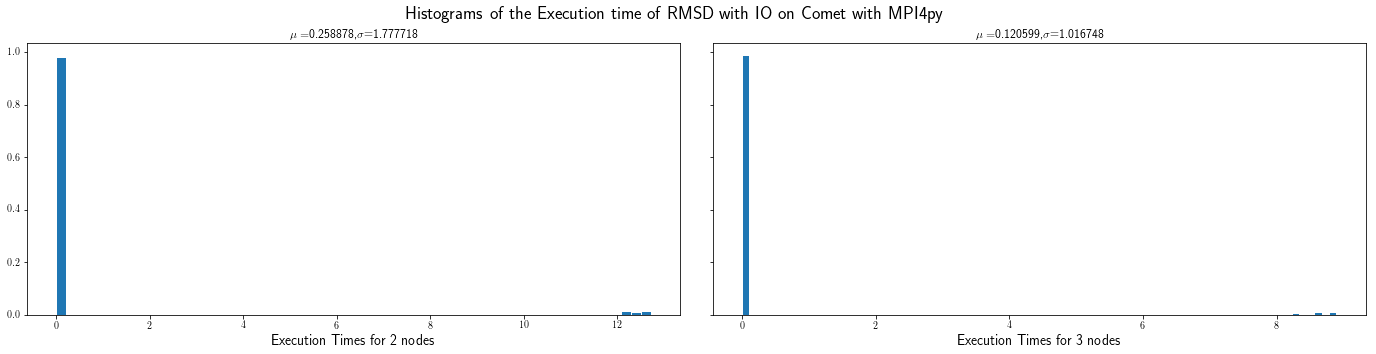

In [10]:
hist,edges = np.histogram((comet_mpi4py2Comp)['Duration'].values,bins=60)
hist = hist/float(len((comet_mpi4py2Comp)['Duration'].values))
width = 0.9 * (edges[1] - edges[0])
center = (edges[:-1] + edges[1:]) / 2

hist2,edges2 = np.histogram((comet_mpi4py3Comp)['Duration'].values,bins=80)
hist2 = hist2/float(len((comet_mpi4py3Comp)['Duration'].values))
width2 = 0.9 * (edges2[1] - edges2[0])
center2 = (edges2[:-1] + edges2[1:]) / 2


fig,axes = plt.subplots(nrows=1,ncols=2, sharex=False,sharey=True,figsize=[24,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
#axes[0].hist((comet_mpi4py1Comp)['Duration'].values,40)
axes[0].bar(center, hist, align='center', width=width)
axes[1].bar(center2, hist2, align='center', width=width2)
fig.suptitle('Histograms of the Execution time of RMSD with IO on Comet with MPI4py',fontsize=18)
#axes[0].set_title('$\mu=$%f,$\sigma$=%f'%((comet_mpi4py1Comp/1.0)['Duration'].mean(),(comet_mpi4py1Comp/1.0)['Duration'].std()),fontsize=12)
axes[0].set_title('$\mu=$%f,$\sigma$=%f'%((comet_mpi4py2Comp/1.0)['Duration'].mean(),(comet_mpi4py2Comp/1.0)['Duration'].std()),fontsize=12)
axes[1].set_title('$\mu=$%f,$\sigma$=%f'%((comet_mpi4py3Comp/1.0)['Duration'].mean(),(comet_mpi4py3Comp/1.0)['Duration'].std()),fontsize=12)
#axes[0].set_xlabel('Execution Times for 1 node', fontsize=14)
axes[0].set_xlabel('Execution Times for 2 nodes',fontsize=14)
axes[1].set_xlabel('Execution Times for 3 nodes',fontsize=14)

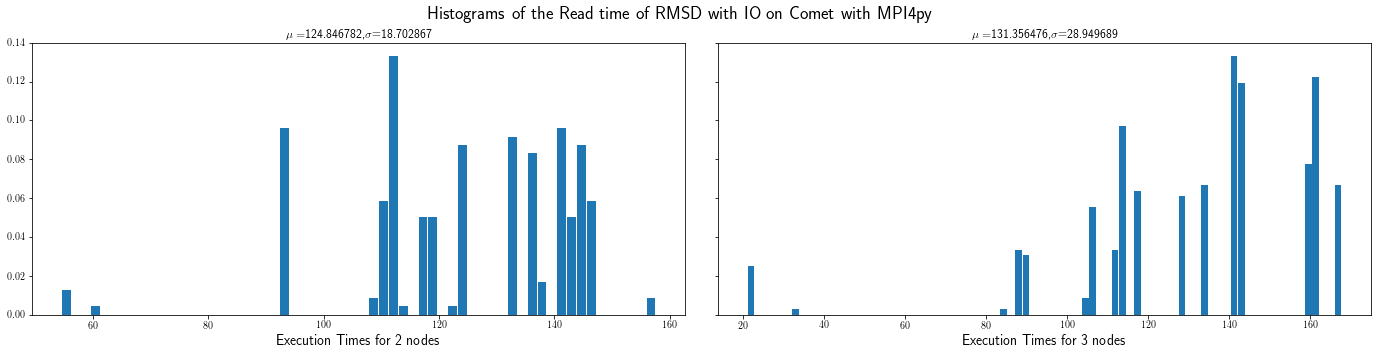

In [11]:
hist,edges = np.histogram((comet_mpi4py2IO)['Duration'].values,bins=60)
hist = hist/float(len((comet_mpi4py2IO)['Duration'].values))
width = 0.9 * (edges[1] - edges[0])
center = (edges[:-1] + edges[1:]) / 2

hist2,edges2 = np.histogram((comet_mpi4py3IO)['Duration'].values,bins=80)
hist2 = hist2/float(len((comet_mpi4py3IO)['Duration'].values))
width2 = 0.9 * (edges2[1] - edges2[0])
center2 = (edges2[:-1] + edges2[1:]) / 2


fig,axes = plt.subplots(nrows=1,ncols=2, sharex=False,sharey=True,figsize=[24,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
#axes[0].hist((comet_mpi4py1Comp)['Duration'].values,40)
axes[0].bar(center, hist, align='center', width=width)
axes[1].bar(center2, hist2, align='center', width=width2)
fig.suptitle('Histograms of the Read time of RMSD with IO on Comet with MPI4py',fontsize=18)
#axes[0].set_title('$\mu=$%f,$\sigma$=%f'%((comet_mpi4py1Comp/1.0)['Duration'].mean(),(comet_mpi4py1Comp/1.0)['Duration'].std()),fontsize=12)
axes[0].set_title('$\mu=$%f,$\sigma$=%f'%((comet_mpi4py2IO/1.0)['Duration'].mean(),(comet_mpi4py2IO/1.0)['Duration'].std()),fontsize=12)
axes[1].set_title('$\mu=$%f,$\sigma$=%f'%((comet_mpi4py3IO/1.0)['Duration'].mean(),(comet_mpi4py3IO/1.0)['Duration'].std()),fontsize=12)
#axes[0].set_xlabel('Execution Times for 1 node', fontsize=14)
axes[0].set_xlabel('Execution Times for 2 nodes',fontsize=14)
axes[1].set_xlabel('Execution Times for 3 nodes',fontsize=14)

In [12]:
#fig,axes = plt.subplots(nrows=1,ncols=3, sharex=False,sharey=True,figsize=[24,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
#axes[0].hist((wrangler_mpi4py1)['Duration'].values,40)
#axes[1].hist((wrangler_mpi4py2)['Duration'].values,80)
#axes[2].hist((wrangler_mpi4py3)['Duration'].values,120)
#fig.suptitle('Histograms of the Compute time of RMSD with no IO on Wrangler with MPI4py',fontsize=18)
#axes[0].set_title('$\mu=$%f,$\sigma$=%f'%((wrangler_mpi4py1/1.0)['Duration'].mean(),(wrangler_mpi4py1/1.0)['Duration'].std()),fontsize=12)
#axes[1].set_title('$\mu=$%f,$\sigma$=%f'%((wrangler_mpi4py2/1.0)['Duration'].mean(),(wrangler_mpi4py2/1.0)['Duration'].std()),fontsize=12)
#axes[2].set_title('$\mu=$%f,$\sigma$=%f'%((wrangler_mpi4py3/1.0)['Duration'].mean(),(wrangler_mpi4py3/1.0)['Duration'].std()),fontsize=12)
#axes[0].set_xlabel('Compute Times for 1 node', fontsize=14)
#axes[1].set_xlabel('Compute Times for 2 nodes',fontsize=14)
#axes[2].set_xlabel('Compute Times for 3 nodes',fontsize=14)

In [13]:
#fig,axes = plt.subplots(nrows=1,ncols=3, sharex=False,sharey=True,figsize=[24,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
#axes[0].hist((comet_dask1)['Duration'].values/1000.0,40)
#axes[1].hist((comet_dask2)['Duration'].values/1000.0,80)
#axes[2].hist((comet_dask3)['Duration'].values/1000.0,120)
#fig.suptitle('Histograms of the Compute time of RMSD with no IO on Comet with Dask',fontsize=18)
#axes[0].set_title('$\mu=$%f,$\sigma$=%f'%((comet_dask1/1000.0)['Duration'].mean(),(comet_dask1/1000.0)['Duration'].std()),fontsize=12)
#axes[1].set_title('$\mu=$%f,$\sigma$=%f'%((comet_dask2/1000.0)['Duration'].mean(),(comet_dask2/1000.0)['Duration'].std()),fontsize=12)
#axes[2].set_title('$\mu=$%f,$\sigma$=%f'%((comet_dask3/1000.0)['Duration'].mean(),(comet_dask3/1000.0)['Duration'].std()),fontsize=12)
#axes[0].set_xlabel('Compute Times for 1 node', fontsize=14)
#axes[1].set_xlabel('Compute Times for 2 nodes',fontsize=14)
#axes[2].set_xlabel('Compute Times for 3 nodes',fontsize=14)

In [14]:
#fig,axes = plt.subplots(nrows=1,ncols=3, sharex=False,sharey=True,figsize=[24,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
#axes[0].hist((wrangler_dask1)['Duration'].values/1000.0,40)
#axes[1].hist((wrangler_dask2)['Duration'].values/1000.0,80)
#axes[2].hist((wrangler_dask3)['Duration'].values/1000.0,120)
#fig.suptitle('Histograms of the Compute time of RMSD with no IO on Wrangler with Dask',fontsize=18)
#axes[0].set_title('$\mu=$%f,$\sigma$=%f'%((wrangler_dask1/1000.0)['Duration'].mean(),(wrangler_dask1/1000.0)['Duration'].std()),fontsize=12)
#axes[1].set_title('$\mu=$%f,$\sigma$=%f'%((wrangler_dask2/1000.0)['Duration'].mean(),(wrangler_dask2/1000.0)['Duration'].std()),fontsize=12)
#axes[2].set_title('$\mu=$%f,$\sigma$=%f'%((wrangler_dask3/1000.0)['Duration'].mean(),(wrangler_dask3/1000.0)['Duration'].std()),fontsize=12)
#axes[0].set_xlabel('Compute Times for 1 node', fontsize=14)
#axes[1].set_xlabel('Compute Times for 2 nodes',fontsize=14)
#axes[2].set_xlabel('Compute Times for 3 nodes',fontsize=14)

In [15]:
#fig,axes = plt.subplots(nrows=1,ncols=3, sharex=False,sharey=True,figsize=[24,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
#axes[0].hist((wrangler_spark1)['Duration'].values/1000.0,40)
#axes[1].hist((wrangler_spark2)['Duration'].values/1000.0,80)
#axes[2].hist((wrangler_spark3)['Duration'].values/1000.0,120)
#fig.suptitle('Histograms of the Compute time of RMSD with no IO on Wrangler with Spark',fontsize=18)
#axes[0].set_title('$\mu=$%f,$\sigma$=%f'%((wrangler_spark1/1000.0)['Duration'].mean(),(wrangler_spark1/1000.0)['Duration'].std()),fontsize=12)
#axes[1].set_title('$\mu=$%f,$\sigma$=%f'%((wrangler_spark2/1000.0)['Duration'].mean(),(wrangler_spark2/1000.0)['Duration'].std()),fontsize=12)
#axes[2].set_title('$\mu=$%f,$\sigma$=%f'%((wrangler_spark3/1000.0)['Duration'].mean(),(wrangler_spark3/1000.0)['Duration'].std()),fontsize=12)
#axes[0].set_xlabel('Compute Times for 1 node', fontsize=14)
#axes[1].set_xlabel('Compute Times for 2 nodes',fontsize=14)
#axes[2].set_xlabel('Compute Times for 3 nodes',fontsize=14)

In [16]:
#fig,axes = plt.subplots(nrows=1,ncols=3, sharex=False,sharey=True,figsize=[24,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
#axes[0].hist((wrangler_rp1)['Duration'].values,40)
#axes[1].hist((wrangler_rp2)['Duration'].values,80)
#axes[2].hist((wrangler_rp3)['Duration'].values,120)
#fig.suptitle('Histograms of the Compute time of RMSD with no IO on Wrangler with RADICAL-Pilot',fontsize=18)
#axes[0].set_title('$\mu=$%f,$\sigma$=%f'%((wrangler_rp1)['Duration'].mean(),(wrangler_rp1)['Duration'].std()),fontsize=12)
#axes[1].set_title('$\mu=$%f,$\sigma$=%f'%((wrangler_rp2)['Duration'].mean(),(wrangler_rp2)['Duration'].std()),fontsize=12)
#axes[2].set_title('$\mu=$%f,$\sigma$=%f'%((wrangler_rp3)['Duration'].mean(),(wrangler_rp3)['Duration'].std()),fontsize=12)
#axes[0].set_xlabel('Compute Times for 1 node', fontsize=14)
#axes[1].set_xlabel('Compute Times for 2 nodes',fontsize=14)
#axes[2].set_xlabel('Compute Times for 3 nodes',fontsize=14)